In [94]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.max_columns', None)

In [95]:
df = pd.read_csv('../../data/dti-competitive-index/2-merged/complete_dataset_with_geo_data.csv')
df

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,-,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018.0,0.0000,0.2337,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1771,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0197,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0072,0.0000,0.0000,0.0218,0.0000,0.0047,0.0000,0.0000,0.1253,0.0000,0.0000,0.0000,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019.0,0.0000,0.0000,2.2500,-,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0000,0.1339,0.0671,2.3451,0.0689,0.3137,2.4231,0.0024,0.0051,2.5000,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020.0,0.0000,0.1653,2.5000,-,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.1665,2.5000,0.1419,0.0013,2.5000,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021.0,0.0000,0.2606,1.2542,-,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0220,2.4545,0.0045,0.0067,2.5000,0.0283,0.1089,1.8750,0.0690,0.0000,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018.0,0.0000,0.0004,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8120,1.0185,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9790,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11

In [96]:
df.shape

(9794, 52)

In [97]:
type(df)

pandas.core.frame.DataFrame

In [98]:
# df = gpd.GeoDataFrame(df, geometry=df['geometry'])
# type(df)

Lets check for **Null** values.

In [99]:
df2 = pd.DataFrame([df.loc[1458]]*5)
df4 = pd.concat([df.iloc[:1458], df2, df.iloc[1458:]], ignore_index=True)
df4


,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,-,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018.0,0.0000,0.2337,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1771,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0197,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0072,0.0000,0.0000,0.0218,0.0000,0.0047,0.0000,0.0000,0.1253,0.0000,0.0000,0.0000,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019.0,0.0000,0.0000,2.2500,-,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0000,0.1339,0.0671,2.3451,0.0689,0.3137,2.4231,0.0024,0.0051,2.5000,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020.0,0.0000,0.1653,2.5000,-,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.1665,2.5000,0.1419,0.0013,2.5000,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021.0,0.0000,0.2606,1.2542,-,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0220,2.4545,0.0045,0.0067,2.5000,0.0283,0.1089,1.8750,0.0690,0.0000,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018.0,0.0000,0.0004,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8120,1.0185,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9795,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11

In [101]:
null_rows = df4[df4['city_municipality'].isnull()]
print(null_rows)

            psgc            name      city_munic        province  \
1458  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1459  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1460  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1461  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1462  1705306000  Brooke's Point  Brooke'S Point         Palawan   
1463  1705306000  Brooke's Point  Brooke'S Point         Palawan   
9252  1206316000          T'Boli          T'Boli  South Cotabato   

                  clean_idx   longitude  latitude                  coords  \
1458  brookespoint, palawan  117.838979  8.773602  8.7736019, 117.8389787   
1459  brookespoint, palawan  117.838979  8.773602  8.7736019, 117.8389787   
1460  brookespoint, palawan  117.838979  8.773602  8.7736019, 117.8389787   
1461  brookespoint, palawan  117.838979  8.773602  8.7736019, 117.8389787   
1462  brookespoint, palawan  117.838979  8.773602  8.7736019, 117.8389

In [102]:
df3 = pd.DataFrame([df4.loc[9252]]*5)
df4 = pd.concat([df4.iloc[:9252], df3, df4.iloc[9252:]], ignore_index=True)
df4

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,-,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018.0,0.0000,0.2337,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1771,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0197,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0072,0.0000,0.0000,0.0218,0.0000,0.0047,0.0000,0.0000,0.1253,0.0000,0.0000,0.0000,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019.0,0.0000,0.0000,2.2500,-,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0000,0.1339,0.0671,2.3451,0.0689,0.3137,2.4231,0.0024,0.0051,2.5000,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020.0,0.0000,0.1653,2.5000,-,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.1665,2.5000,0.1419,0.0013,2.5000,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021.0,0.0000,0.2606,1.2542,-,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0220,2.4545,0.0045,0.0067,2.5000,0.0283,0.1089,1.8750,0.0690,0.0000,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018.0,0.0000,0.0004,0.0000,-,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8120,1.0185,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9800,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11

In [103]:
df4.to_csv('main.csv', index=False)

In [65]:
df.shape

(9794, 52)

In [11]:
df.describe()

,psgc,longitude,latitude,FID,year
count,9.794000e+03,9794.000000,9794.000000,9794.000000,9792.000000
mean,8.232739e+08,122.781169,12.006995,816.422401,2019.500000
std,5.345669e+08,1.810949,3.528151,471.497082,1.707912
min,1.028010e+08,117.064731,4.662269,0.000000,2017.000000
25%,4.034040e+08,121.059208,9.003888,408.250000,2018.000000
50%,7.022350e+08,122.796664,11.655596,816.500000,2019.500000
75%,1.108605e+09,124.332967,14.828949,1224.750000,2021.000000
max,1.908824e+09,126.564629,20.787814,1633.000000,2022.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  

We know we have lots of zeros, so lets count them. First we need to change the columns from **object** to **float**.  
  
The conversion to **floats** failed due to there being **'-'** in the columns.  
  
Lets see where they are and how many.

In [52]:
dash_by_column = (df4 == '-').sum() / 100
dash_by_column

psgc                                                    0.00
name                                                    0.00
city_munic                                              0.00
province                                                0.00
clean_idx                                               0.00
longitude                                               0.00
latitude                                                0.00
coords                                                  0.00
geometry                                                0.00
FID                                                     0.00
city_municipality                                       0.00
year                                                    0.00
accommodation_capacity                                  5.40
active_establishments_in_the_locality                   5.51
annual_disaster_drill                                   5.40
availability_of_basic_internet_service                 81.63
availability_of_basic_ut

We can see that they are all in the DTi features and that `availability_of_basic_internet_service` has 81.63% and the rest around 5.4%.  
  
Lets delete `availability_of_basic_internet_service` and convert the rest to zeros.

In [87]:
del df4['availability_of_basic_internet_service']
df4.head(1)

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949


In [53]:
df4.replace('-', 0, inplace=True)

In [54]:
df4[df4.columns[12:51]] = df4[df4.columns[12:51]].astype(float)

In [55]:
df4['year'] = df4['year'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [92]:
df[df.columns[12:51]].replace(0, np.nan, inplace=True)

C:\Users\kmedr\AppData\Local\Temp\ipykernel_15460\3102362137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[12:51]].replace(0, np.nan, inplace=True)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  

In [69]:
zeros_by_column = df.eq(0).sum()
zeros_by_column

psgc                                                      0
name                                                      0
city_munic                                                0
province                                                  0
clean_idx                                                 0
longitude                                                 0
latitude                                                  0
coords                                                    0
geometry                                                  0
FID                                                       6
city_municipality                                         0
year                                                      0
accommodation_capacity                                 5621
active_establishments_in_the_locality                  1481
annual_disaster_drill                                  2628
availability_of_basic_utilities                        2203
budget_for_drrmp                        

<function matplotlib.pyplot.show(close=None, block=None)>

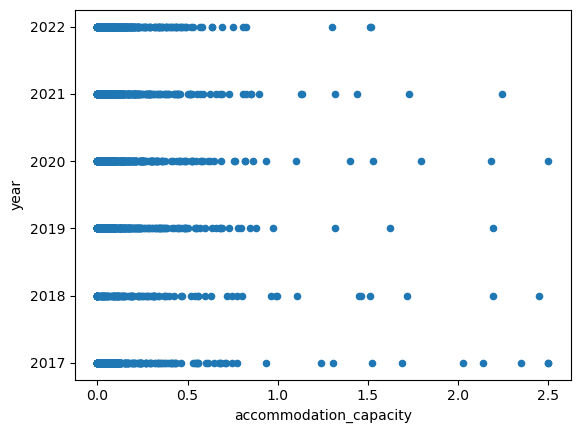

In [78]:
df.plot(kind='scatter', x='accommodation_capacity', y='year')
plt.show

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9794 non-null   int64  
 1   name                                                 9794 non-null   object 
 2   city_munic                                           9794 non-null   object 
 3   province                                             9794 non-null   object 
 4   clean_idx                                            9794 non-null   object 
 5   longitude                                            9794 non-null   float64
 6   latitude                                             9794 non-null   float64
 7   coords                                               9794 non-null   object 
 8   geometry                                             9746 non-null  